<html>
<table width="100%" cellspacing="2" cellpadding="2" border="1">
<tbody>
<tr>
<td valign="center" align="center" width="45%"><img src="../media/Univ-Utah.jpeg"><br>
</td>
    <td valign="center" align="center" width="75%">
<h1 align="center"><font size="+1">University of Utah<br>Population Health Sciences<br>Data Science Workshop</font></h1></td>
<td valign="center" align="center" width="45%"><img
src="../media/U_Health_stacked_png_red.png" alt="Utah Health
Logo" width="128" height="134"><br>
</td>
</tr>
</tbody>
</table>
<br>
</html>


In [6]:
from helpers import *

# Data Analysis with Pandas
This notebook will do a deeper dive into the `pandas` library.

## Data source

This dataset has been saved to this directory as **"500_Person_Gender_Height_Weight_Index.csv"**. It originally came from [Kaggle](https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex/data).

#### TODO
We'll start by reading in the csv file containing the data. Pandas can read files of a number data types. First, import pandas with the alias `pd`.

In [1]:
import pandas as pd

Next, we need to tell pandas where to find our data source. This dataset is saved as a comma-separated values (csv) file in the following location:

`../data/500_Person_Gender_Height_Weight_Index.csv`

A **filepath** like the one above tells your program where to find a file on your machine. This filepath means:
- `..`: Go up one folder/directory
- `../data/`: Go to the folder called `data`
- `../data/500_Person_Gender_Height_Weight_Index.csv`: In the data folder, look for a file called **"500_Person_Gender_Height_Weight_Index.csv"**

#### TODO
Using the appropriate pandas function (see the previous notebook), pass in the filepath as a string. Save the resulting object as a variable called `df`.

In [56]:
df = pd.read_csv("../data/500_Person_Gender_Height_Weight_Index.csv")

Now, let's get a sense of our dataset. The method `df.head()` subsets the first 5 rows of a DataFrame and can give us a quick look at the data structure.

#### TODO
Take a look at the first 5 rows of the dataset. What variables are in it? What data types are they? What would be some useful summary statistics to analyze this dataset?

In [5]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


#### TODO
Which of the variables appear to be **categorical** variables? What do the values in these columns mean?

**Hint**: Look at the Kaggle link above if you need some additional information about a column.

In [10]:
SelectMultipleQuiz(answer=("Gender", "Index"), 
                   options=("Gender", "Height", "Weight", "Index"), 
                   shuffle_answer=False)


#### TODO
Calculate summary statistics for all of the numeric columns in the dataset. Then calculate the min, max, and mean values for **Height**.

In [13]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
# Mean
df[____].mean() 

In [ ]:
# Min
df["Weight"].____()

In [ ]:
# Max
df[___].____()

## Aggregating by Variables
We can call methods on the columns of a DataFrame to do additional analysis on specific variables. Let's look at two categorical variables: **Gender** and **Index**. With categorical variables, we might want to get the count of rows where the variable takes on a certain value. For example, how many rows are **Male** vs. **Female**? What are the average height and weight within these two categories?

One way to do this is by using the `groupby` method. This **aggregates** the dataframe by a variable (such as **Gender**) and then calculates statistics within each category. 

**Note**: This is the equivalent in SQL of using  `GROUP BY` clause. We'll learn more about that tomorrow.

The syntax for a pandas group by is:

`df.groupby("column_name").agg_function()`

where `agg_function()` is a function which calculates a summary statistic of interest.

For example, one aggregate function is `size()`, which calculates the number of rows in each category:

In [15]:
df.groupby("Gender").size()

Gender
Female    255
Male      245
dtype: int64

#### TODO
Calculate the number of people within each level of **Index**. Then answer the quiz question below.

In [71]:
df.groupby("Index").size()

Index
0     13
1     22
2     69
3     68
4    130
5    198
dtype: int64

In [21]:
MultipleChoiceQuiz(description="How many subjects have an Index of 0, 3, and 5, respectively?",
                   answer="13, 68, 198",
                  options=["13, 68, 198", "68, 13, 198", "13, 22, 130"])

We can also group by multiple variables:

In [31]:
df.groupby(["Gender", "Index"]).size()

Gender  Index
Female  0          7
        1          7
        2         41
        3         36
        4         71
        5         93
Male    0          6
        1         15
        2         28
        3         32
        4         59
        5        105
dtype: int64

If we group by a categorical variable, we can then analyze the distribution of numeric columns within each category. To do that, we have to first group by our grouping variable, access the numeric column, and then call the aggregate statistic. 

In [24]:
df.groupby("Gender")["Height"].mean()

Gender
Female    170.227451
Male      169.648980
Name: Height, dtype: float64

In [27]:
df.groupby("Gender")["Height"].median()

Gender
Female    170.0
Male      171.0
Name: Height, dtype: float64

Just like with a normal DataFrame, we can access multiple columns and perform multiple aggregations at once.

In [30]:
df.groupby("Gender")[["Height", "Weight"]].describe()

Height                                                            \
        count        mean        std    min    25%    50%    75%    max   
Gender                                                                    
Female  255.0  170.227451  15.711825  140.0  157.0  170.0  184.0  199.0   
Male    245.0  169.648980  17.065665  140.0  154.0  171.0  183.0  199.0   

       Weight                                                          
        count        mean        std   min   25%    50%    75%    max  
Gender                                                                 
Female  255.0  105.698039  32.962025  50.0  79.0  106.0  135.0  160.0  
Male    245.0  106.314286  31.832734  50.0  80.0  105.0  137.0  160.0

#### TODO
Group the dataset by **Index** and look at the distribution of **Height** and **Weight** within each category. The find the following values and put your answers in the subsequent quizzes:
- The mean height for subjects with an Index of **3**
- The median height for subjects with an Index of **5**
- The max height for a female subject with an index of 0

In [34]:
df.groupby("Index")[["Height", "Weight"]].describe()

Height                                                              \
       count        mean        std    min     25%    50%     75%    max   
Index                                                                      
0       13.0  187.538462   9.341800  163.0  183.00  190.0  193.00  198.0   
1       22.0  184.772727   8.535259  168.0  179.00  186.0  192.50  196.0   
2       69.0  174.260870  13.786878  148.0  163.00  177.0  185.00  199.0   
3       68.0  175.985294  15.500113  140.0  164.00  181.5  188.00  198.0   
4      130.0  173.876923  15.609585  140.0  165.00  176.0  186.75  199.0   
5      198.0  160.979798  14.289238  140.0  149.25  159.5  171.00  196.0   

      Weight                                                             
       count        mean        std   min     25%    50%     75%    max  
Index                                                                    
0       13.0   51.692308   2.323238  50.0   50.00   50.0   54.00   57.0  
1       22.0   59.409091   5.270394  50.0   56.00   59.5   62.00   69.0  
2       69.0   69.086957  12.062020  50.0   59.00   68.0   79.00   99.0  
3       68.0   86.882353  15.917258  52.0   71.75   89.5  100.00  115.0  
4      130.0  107.953846  21.463819  66.0   90.50  109.5  122.75  156.0  
5      198.0  132.888889  21.099421  79.0  118.25  139.5  149.75  160.0

In [38]:
df.groupby("Index")["Height"].mean()

Index
0    187.538462
1    184.772727
2    174.260870
3    175.985294
4    173.876923
5    160.979798
Name: Height, dtype: float64

In [41]:
MultipleChoiceQuiz(description="What is the mean height for subjects with an Index of 3?",
                  answer=175.99,
                  options=(173.88, 13.5,173.87))

In [42]:
df.groupby("Index")["Height"].median()

Index
0    190.0
1    186.0
2    177.0
3    181.5
4    176.0
5    159.5
Name: Height, dtype: float64

In [43]:
MultipleChoiceQuiz(description="What is the median height for subjects with an Index of 5?",
                  answer=159.5,
                  options=(190.0, 187.54,160.98))

In [44]:
df.groupby(["Gender", "Index"])["Height"].max()

Gender  Index
Female  0        198
        1        195
        2        199
        3        197
        4        198
        5        196
Male    0        198
        1        196
        2        199
        3        198
        4        199
        5        195
Name: Height, dtype: int64

In [45]:
df.groupby(["Gender", "Index"])["Height"].min()

Gender  Index
Female  0        163
        1        170
        2        148
        3        149
        4        140
        5        140
Male    0        181
        1        168
        2        154
        3        140
        4        142
        5        140
Name: Height, dtype: int64

In [46]:
MultipleChoiceQuiz(description="What is the max height for a female subject with an index of 0?",
                  answer=196,
                  options=(195, 197, 140))

### Visualization with `pandas`
We'll learn more about visualization packages in one of the next notebooks. But pandas has a few out-of-the-box methods that are helpful visualizing a dataset.

One example is plotting **histogram** of the values in a column:

<AxesSubplot:>

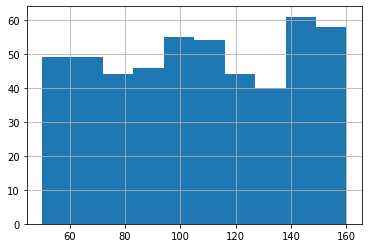

In [72]:
df["Weight"].hist()

#### TODO
Plot a histogram of the **Index** column to see how many individuals are in each group.

<AxesSubplot:>

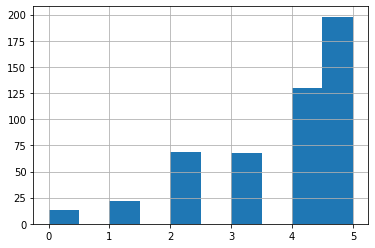

In [74]:
df["Index"].hist()

We can plot a **box plot** to see how the numeric columns are distributed within a categorical variable. For example, the code below first groups by **"Index"** and puts those on the x-axis, then plots the distribution of height and weight on the y-axis. What patterns does this visualization reveal?

Height       AxesSubplot(0.125,0.125;0.352273x0.755)
Weight    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

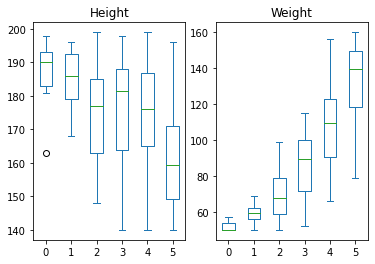

In [83]:
df.plot.box("Index")

#### TODO
Plot box plots of height and weight (but not index) with **"Gender"** on the x-axis.

Height       AxesSubplot(0.125,0.125;0.352273x0.755)
Weight    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

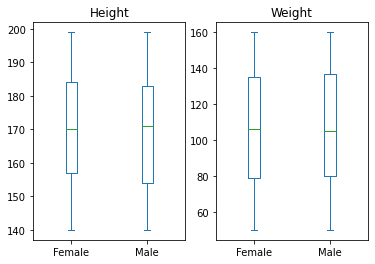

In [86]:
df[["Height", "Weight", "Gender"]].plot.box("Gender")

We can also plot two columns against each other in a scatterplot. This is helpful for assessing if there is any correlation between the two variables.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

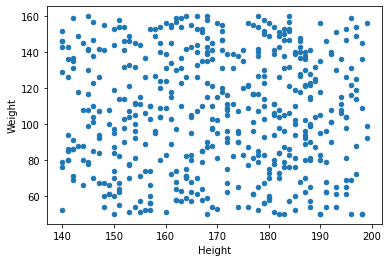

In [87]:
df.plot.scatter(x="Height", y="Weight")

We can also quantify this correlation with the `.corr()` method. What does this value and the plot above tell you about the correlation of height and weight? Does that surprise you?

In [91]:
df["Height"].corr(df["Weight"])

0.00044594512830535104

It can useful to break the data up into subgroups to see if any of the trends differ.

#### TODO
Let's see if there is the correlation between height and weight looks any different in different `Index` groups. For each of levels **1**, **3**, and **5**, create a new DataFrame which is filtered to only include patients within that group. Then create a scatter plot of height and weight within each group and calculate the correlation.


In [97]:
df_index1 = df.query("Index == 1")
df_index3 = df.query("Index == 3")
df_index5 = df.query("Index == 5")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

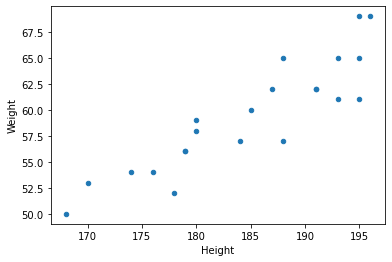

In [98]:
df_index1.plot.scatter(x="Height", y="Weight")

In [99]:
df_index1["Height"].corr(df_index1["Weight"])

0.8945424454209588

<AxesSubplot:xlabel='Height', ylabel='Weight'>

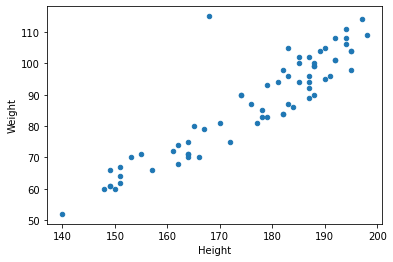

In [95]:
df_index3.plot.scatter(x="Height", y="Weight")

In [101]:
df_index3["Height"].corr(df_index3["Weight"])

0.9132308729906881

<AxesSubplot:xlabel='Height', ylabel='Weight'>

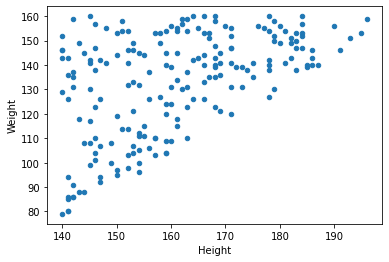

In [96]:
df_index5.plot.scatter(x="Height", y="Weight")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

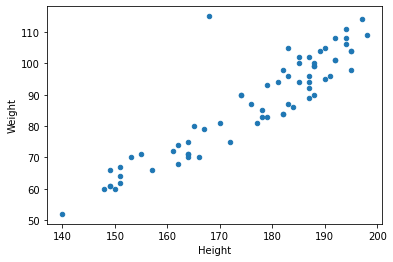

In [65]:
df.query("Index == 3").plot.scatter(x="Height", y="Weight")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

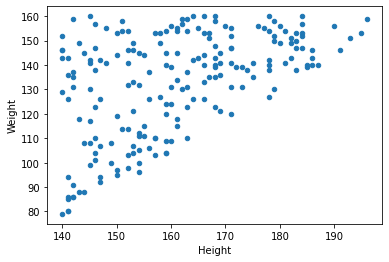

In [67]:
df.query("Index == 5").plot.scatter(x="Height", y="Weight", )

In [102]:
df_index5["Height"].corr(df_index5["Weight"])

0.5040127029205534

##

<AxesSubplot:xlabel='Height', ylabel='Weight'>

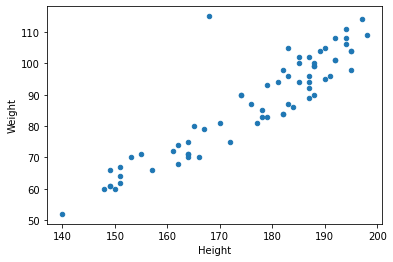

In [108]:
df.query("Index == 3").plot.scatter(x="Height", y="Weight")

## Creating new columns
We can also add new columns to a DataFrame, often constructed using the other variables.

We can create a new column by saying:
```python
df["column_name"] = value
```

The value value a single scalar, a list, a series, etc. Unless it's a scalar, it needs to be the same length as the DataFrame.

#### TODO
Square the **Height** column of `df` and save it as a new column called `"height_sqrd"`

In [119]:
df["height_sqrd"] = (df["Height"] ** 2)

In [120]:
df.head()

,Gender,Height,Weight,Index,height_sqrd
0,Male,174,96,4,30276
1,Male,189,87,2,35721
2,Female,185,110,4,34225
3,Female,195,104,3,38025
4,Male,149,61,3,22201


Let's use the height and weight columns to create a new column with **BMI** measurements. BMI is calculated from height and weight using this equation:

$$BMI = \frac{Weight (kg)}{Height (m) ^ 2}$$

#### TODO
To get the BMI measurement, we'll need to go through a few steps:
1. Convert **Height** from centimers to meters. We'll save this as a new variabled called `height_m`
2. Square the **Height in meters** column. Save this as a variable `height_m_sqrd`
3. Divide the **Weight** column by the **Height in meters** column. Save this as a variabled called `bmi`
4. Assign the result to a new column in `df` called `"bmi"` and plot it in a histogram.

In [121]:
df["height_sqrd"] / df["Height"] == df["Height"]

0      True
1      True
2      True
3      True
4      True
       ... 
495    True
496    True
497    True
498    True
499    True
Length: 500, dtype: bool

In [113]:
height_m = df["Height"] / 100
height_m

0      1.74
1      1.89
2      1.85
3      1.95
4      1.49
       ... 
495    1.50
496    1.84
497    1.41
498    1.50
499    1.73
Name: Height, Length: 500, dtype: float64

In [114]:
height_m_sqrd = height_m ** 2
height_m_sqrd

0      3.0276
1      3.5721
2      3.4225
3      3.8025
4      2.2201
        ...  
495    2.2500
496    3.3856
497    1.9881
498    2.2500
499    2.9929
Name: Height, Length: 500, dtype: float64

In [122]:
df["bmi"] = df["Weight"] / height_m_sqrd
df["bmi"]

0      31.708284
1      24.355421
2      32.140248
3      27.350427
4      27.476240
         ...    
495    68.000000
496    35.739603
497    68.407022
498    42.222222
499    43.770256
Name: bmi, Length: 500, dtype: float64

<AxesSubplot:>

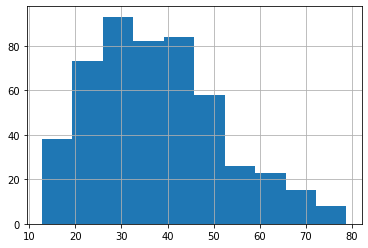

In [123]:
df["bmi"].hist()